   Home   Price  SqFt_living  Bedrooms  Bathrooms
0     1  114300         1790         2          2
1     2  114200         2030         4          2
2     3  114800         1740         3          2
3     4   94700         1980         3          2
4     5  119800         2130         3          3
Home           0
Price          0
SqFt_living    0
Bedrooms       0
Bathrooms      0
dtype: int64
Mean Squared Error: 320149938.23026496
R-squared: 0.45681957775489324


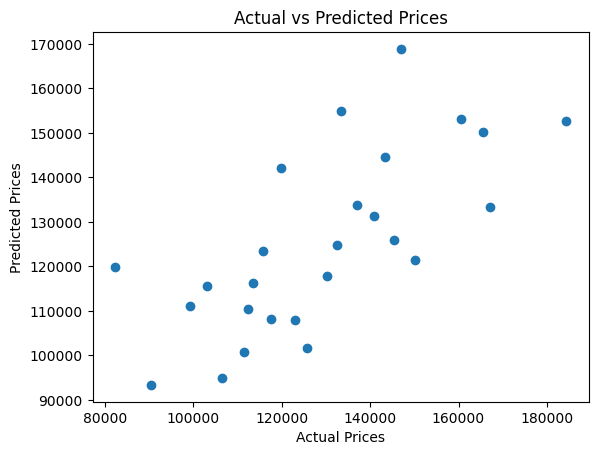

/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Price for a house with 2000 sqft living area, 3 bedrooms, and 2 bathrooms: $26185089.81


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('house_prices.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if any)
data = data.dropna()

# Select features and target variable
features = ['Bedrooms', 'Bathrooms', 'SqFt_living']
X = data[features]
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


# Now, define the prediction function using the trained model

def predict_house_price(sqft_living, bedrooms, bathrooms):
    # Create a numpy array for the input data
    input_data = np.array([[bedrooms, bathrooms, sqft_living]])  # Note: Order changed to match previous definition
    
    # Use the trained model to make a prediction
    predicted_price = model.predict(input_data)
    
    return predicted_price[0]

# Example usage of the prediction function
predicted_price = predict_house_price(3, 2, 2000)  # Order adjusted to match the previous function
print(f"Predicted Price for a house with 2000 sqft living area, 3 bedrooms, and 2 bathrooms: ${predicted_price:.2f}")
